# **MVP de Engenharia de Dados**

Pontifícia Universidade Católica do Rio de Janeiro

Curso: Ciência de Dados e Analytics

Autor: Leticia Paumer

### **1. Definição do problema**


O objetivo deste trabalho é analisar dados de cotações do mercado financeiro de grandes empresas de tecnologia. Ao final do projeto, esperamos responder às seguintes perguntas:

1. Qual foi o valor mínimo e máximo que as cotações dessas empresas alcançaram nos últimos anos?
2. A pandemia de Covid-19 teve algum impacto no valor das ações dessas empresas?
3. Quanto as ações de cada uma dessas empresas valorizaram em 10 anos?
4. Das empresas que mais cresceram e das que menos cresceram em 10 anos, qual foi o volume médio de transações nesse período?
5. Quais dessas empresas são mais novas no mercado? Qual foi o valor médio das cotações dessas empresas no último ano?


Para atingir o objetivo deste trabalho, realizaremos a coleta e modelagem dos dados das cotações do mercado financeiro. Utilizaremos um serviço de nuvem para criar um pipeline que realizará o processo de ETL (extração, transformação e carga) dos dados. Esse pipeline garantirá a integridade e a qualidade dos dados, proporcionando uma base sólida para análises e conclusões. A análise dos dados também será realizada na nuvem, permitindo insights mais rápidos e precisos, aproveitando a capacidade computacional escalável e os recursos avançados disponíveis.


A plataforma de nuvem escolhida para o desenvolvimento deste projeto foi a Microsoft Azure, que oferece várias ferramentas essenciais, como Databricks, Data Factory e outras que serão abordadas ao longo do trabalho.

### **2. Busca pelos dados**

Utilizando o Kaggle, uma plataforma que disponibiliza diversas bases de dados gratuitas, selecionamos um conjunto de dados contendo os preços diários das ações e volumes de 14 diferentes empresas de tecnologia, sendo elas: Apple, Amazon, Alphabet, Meta Platforms, Adobe, Cisco Systems, IBM, Intel Corporation, Netflix, Tesla, Salesforce, Microsoft Corporation, Oracle e NVIDIA. A base de dados contém informações de janeiro de 2010 a janeiro de 2023, aproximadamente.

O conjunto de dados é composto por dois arquivos:


*   **big_tech_stock_prices.csv**: o arquivo contém dados de cotações de empresas de tecnologia, totalizando 45088 registros.
*   **big_tech_companies.csv**: o arquivo contém o símbolo e o nome completo da empresa, totalizando 14 registros.




Fonte da base de dados: https://www.kaggle.com/datasets/umerhaddii/big-tech-giants-stock-price-data?select=big_tech_stock_prices.csv




### **3. Coleta e modelagem**

#### **3.1 Coleta**

Para manipulação de arquivos na nuvem, foi criada uma Storage Account na Azure, onde os arquivos foram carregados manualmente em um container do Azure Data Lake Storage Gen2. Este serviço de armazenamento em nuvem da Microsoft Azure é projetado para grandes volumes de dados e análise avançada.

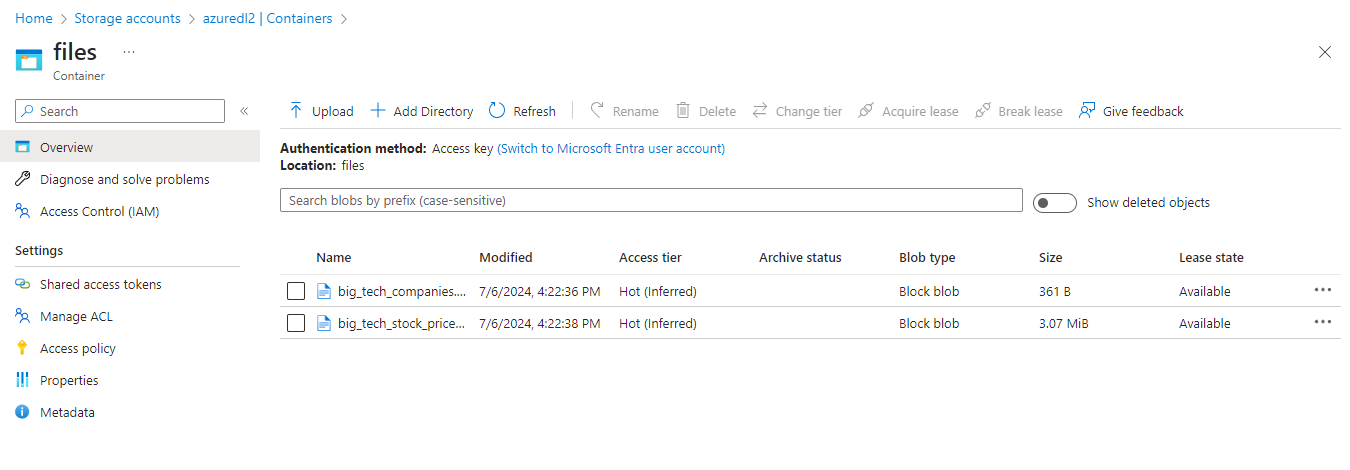

#### **3.2 Modelagem**

##### **3.2.1 Modelo de dados**

Para este projeto, definimos um modelo de dados em Esquema Estrela. Nesse modelo, os dados de cotações formam a tabela fato, enquanto as tabelas de empresa e data constituem as dimensões. Essa estrutura facilita a organização e análise dos dados, proporcionando uma visão clara e eficiente do banco de dados. Podemos visualizar a estrutura no diagrama abaixo.

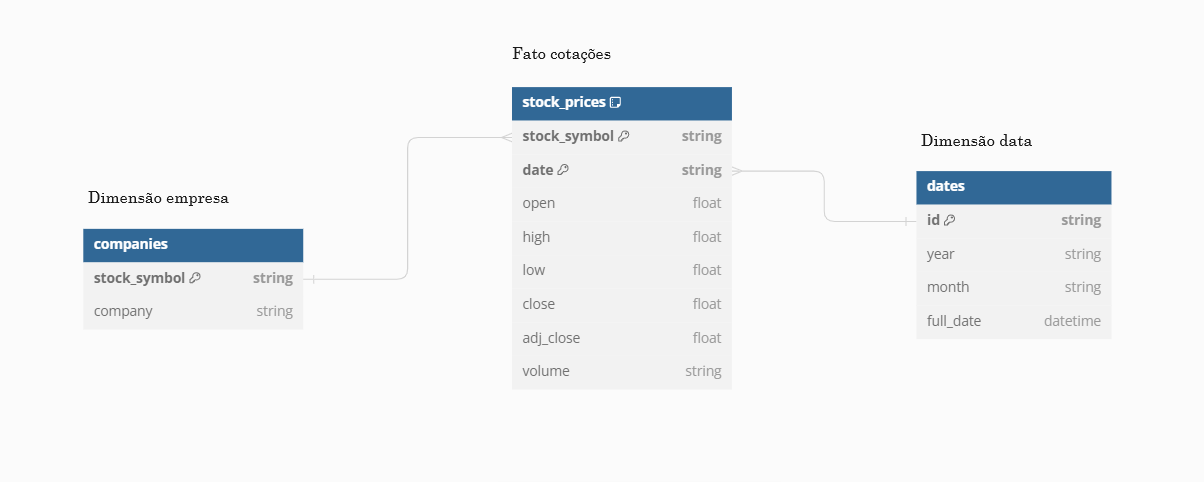

Como local de armazenamento para este esquema de dados, optou-se pelo Azure SQL Database da Microsoft Azure, um serviço de banco de dados relacional na nuvem. Ele proporciona escalabilidade, alta disponibilidade com recuperação automática, e segurança avançada através de criptografia e controle de acesso.

##### **3.2.2 Catálogo de Dados**

Nesta sessão, realizaremos a catalogação dos dados utilizados no projeto. Na imagem abaixo, podemos visualizar o documentação do banco de dados.

`database mvpbd`

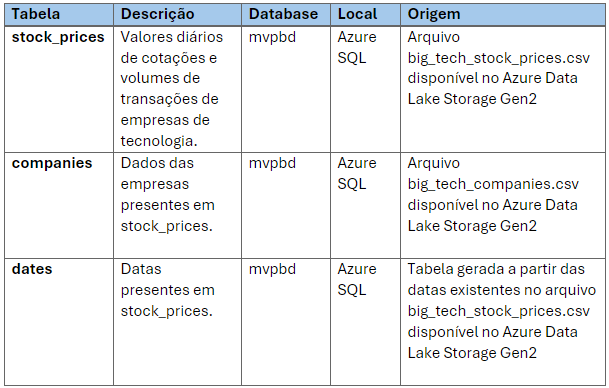

E a seguir, temos a descrição de cada tabela disponível em nosso banco de dados.

`Tabela stock_prices`

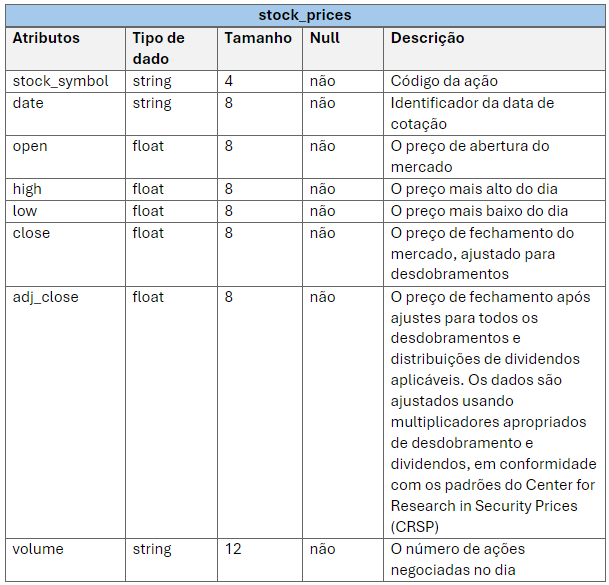

`tabela companies`

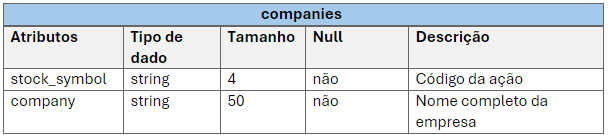

`tabela dates`

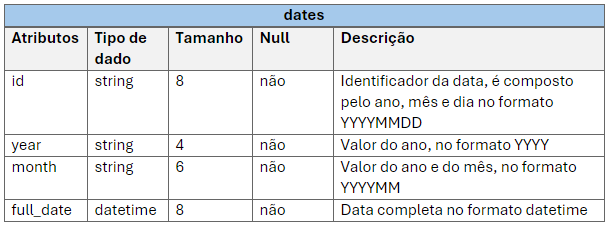

### **4. ETL (Extract, Transform, Load)**

Para a construção e execução do processo de ETL desses dados, utilizaremos a ferramenta Data Factory. O Azure Data Factory é um serviço de integração de dados na nuvem que permite criar, agendar e gerenciar fluxos de trabalho de ETL (Extração, Transformação e Carga) de maneira eficiente e escalável.

Inicialmente, criaremos um novo Pipeline no Data Factory, no qual adicionaremos um Data Flow para definir o fluxo de criação das três tabelas.

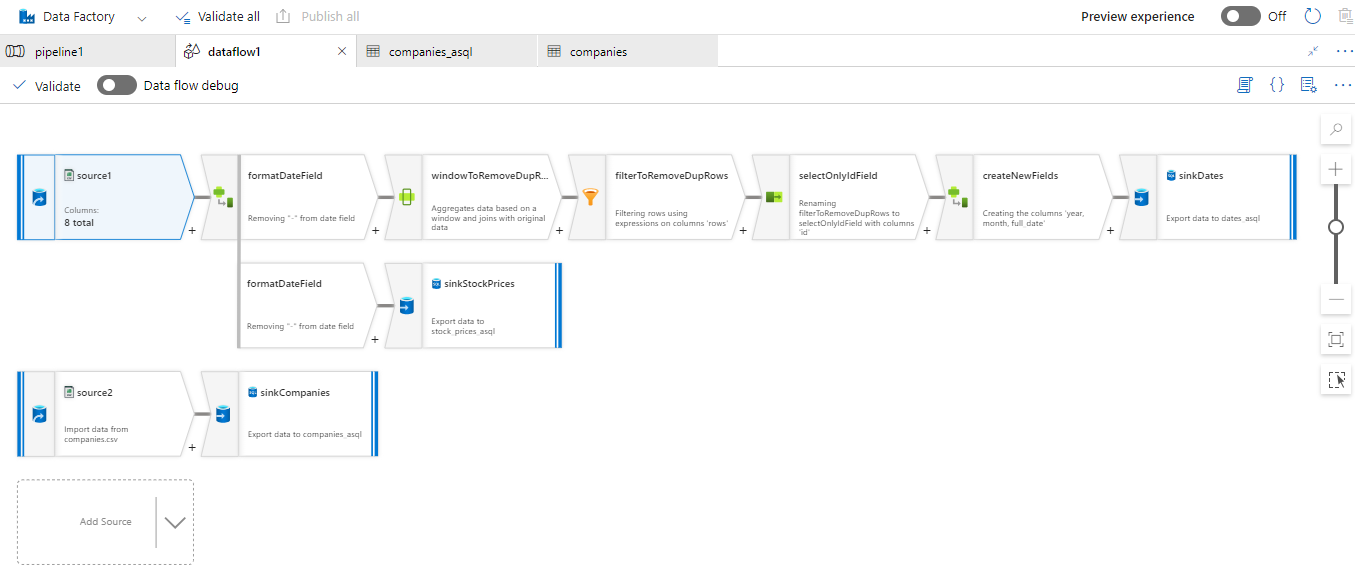

No início do processo, os dados são buscados no Azure Data Lake Storage Gen2, onde carregamos manualmente os arquivos CSV. Em seguida, realizamos todo o processo de limpeza e tratamento de dados. Por fim, os dados de saída são armazenados no banco de dados Azure SQL, onde serão feitas consultas posteriormente.

A seguir, veremos de forma individual o processo de criação de cada tabela. Iniciando pela tabela stock_prices, após buscar os dados na origem, eles passam por um processo de tratamento chamado Derived Column, onde formatamos o campo de data, removendo os separadores para deixá-lo no formato YYYYMMDD. Esse tratamento é necessário pois o campo de data será uma referência para chave da tabela de datas, que possui esse formato.

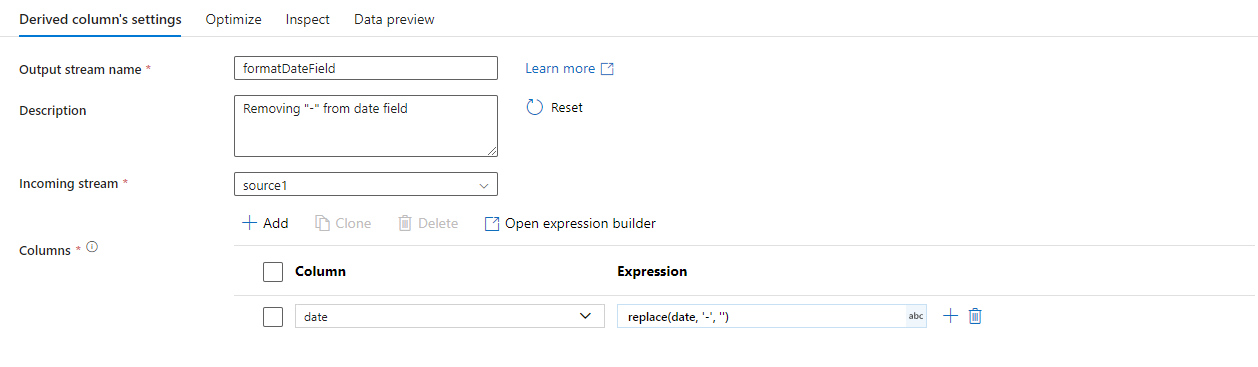

Após o tratamento, o processo de Sink armazena a tabela stock_prices no banco de dados de destino.

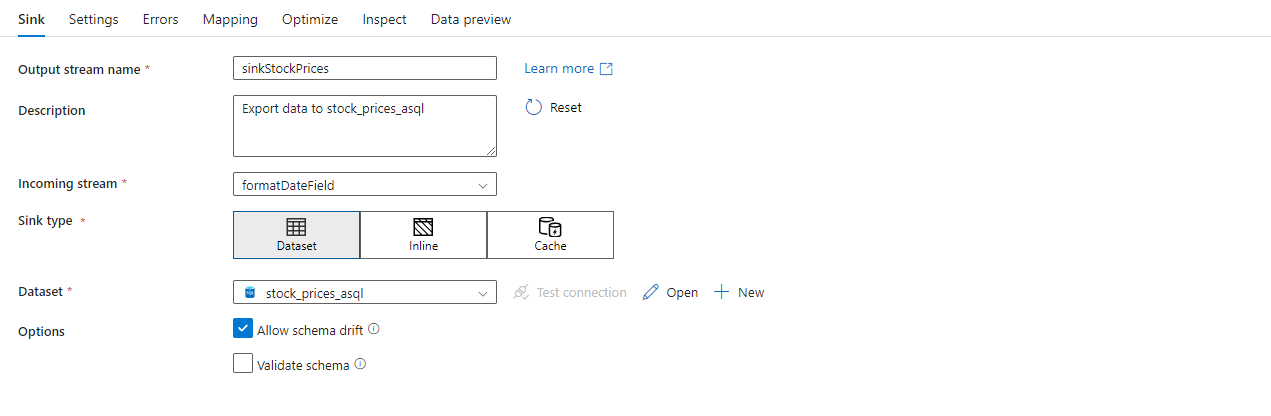

A tabela companies é gerada diretamente do arquivo de origem, pois não é necessário nenhum tratamento adicional.

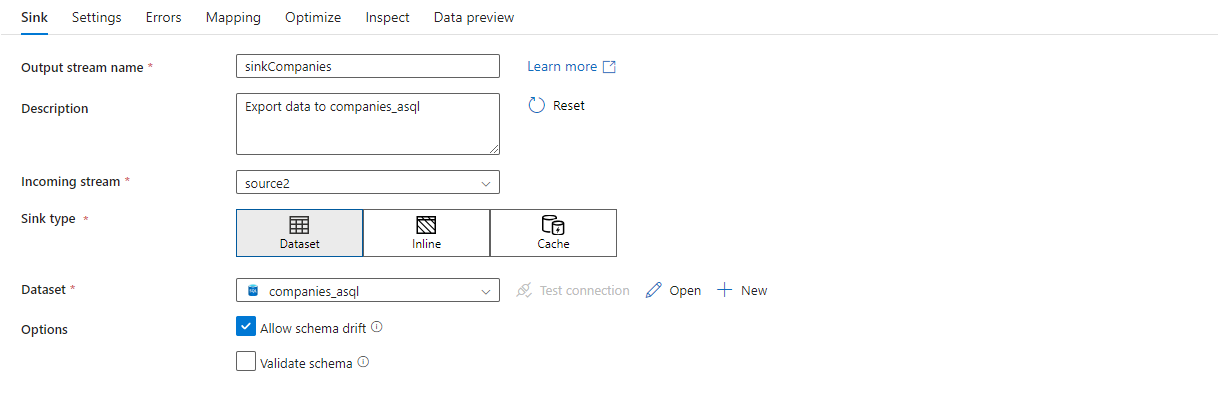

Já para a criação da tabela dates, o processo de carga é um pouco mais complexo, pois geramos essa tabela a partir das datas existentes no arquivo de origem stock_prices. Após a remoção dos separadores de data, criamos uma janela (window) para enumerar todas as linhas com datas duplicadas. Em seguida, utilizamos o processo de filtro para remover todas as duplicatas, garantindo que a tabela dates contenha apenas datas únicas.

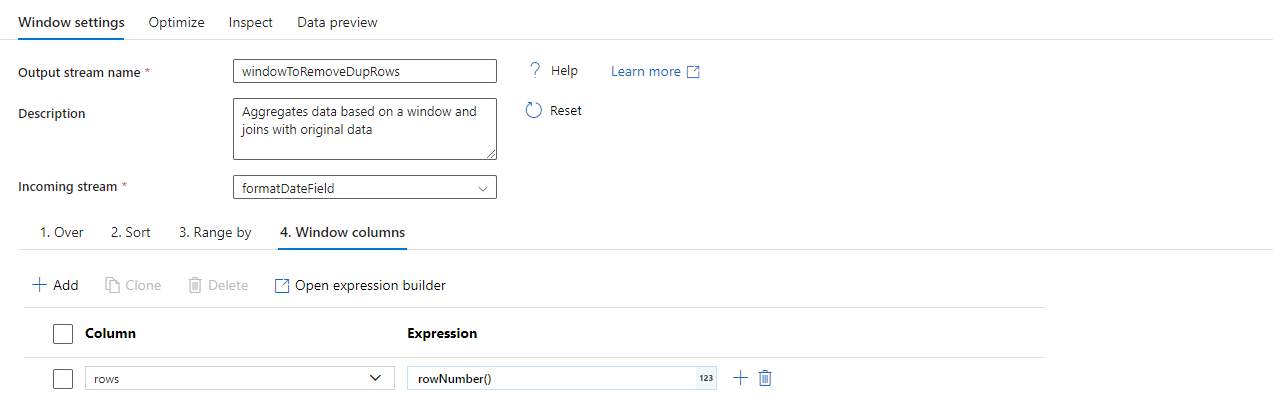

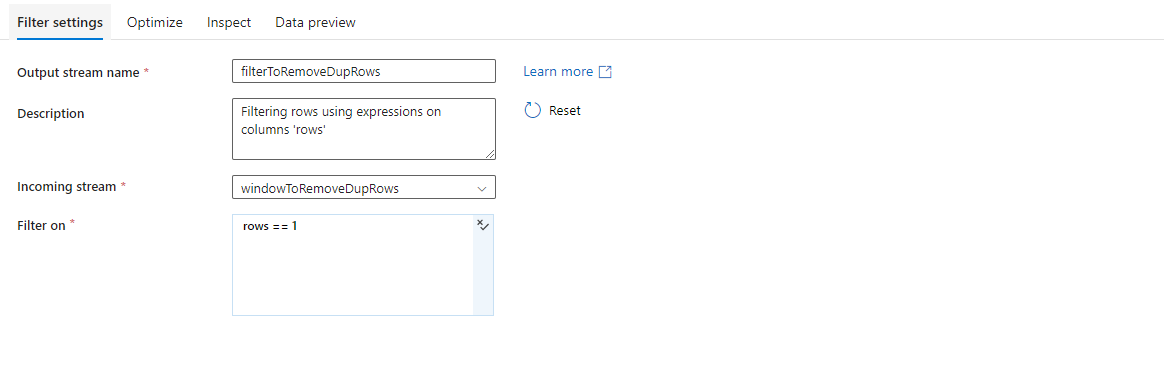

Por fim, utilizamos um Select para manter apenas o campo de data, que é renomeado para id. Em seguida, criamos um Derived Column para gerar os campos "month", "year" e "full_date", todos baseados no campo id.

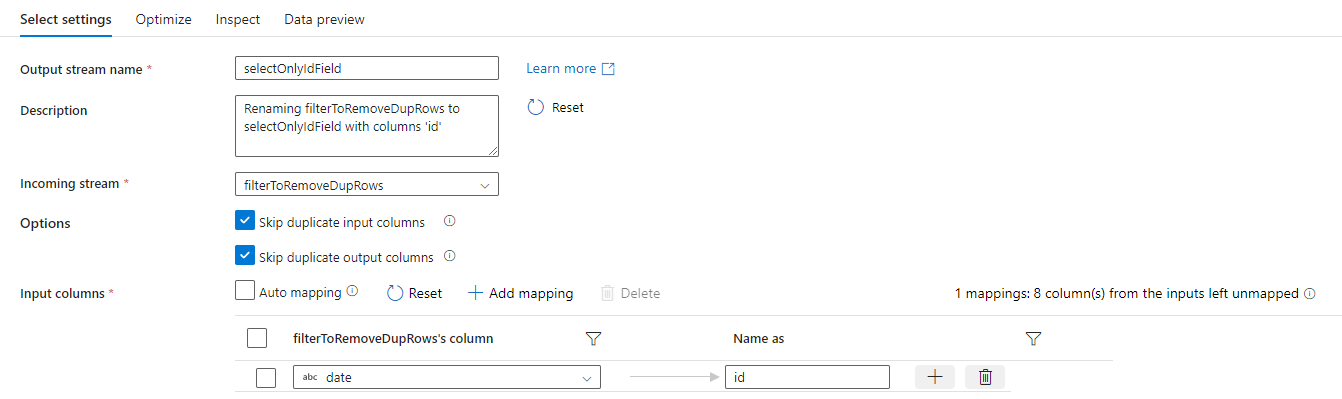

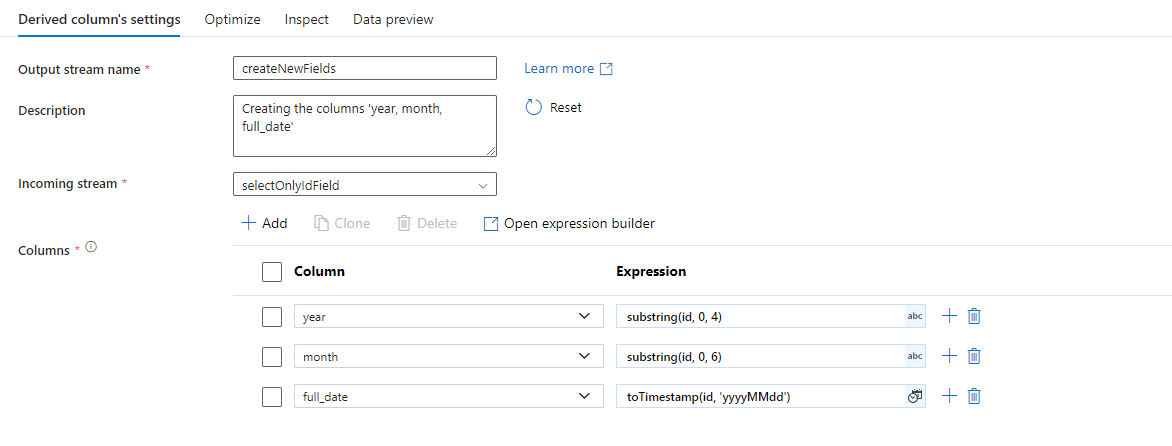

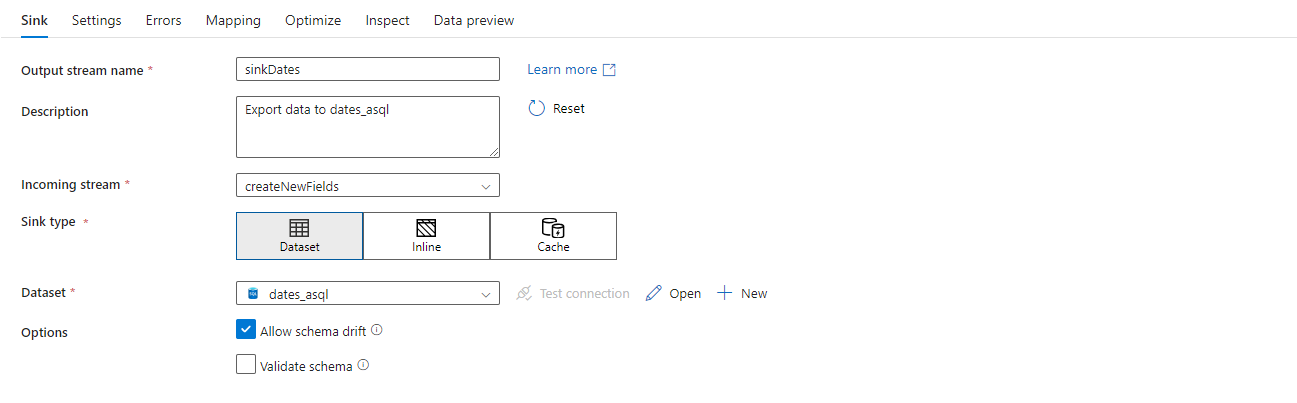

Após a criação do pipeline, precisamos executá-lo para gerar as tabelas no banco de dados. No Data Factory, podemos agendar um trigger para a execução do pipeline ou dispará-lo manualmente. Neste caso, iremos dispará-lo manualmente, pois só precisamos executá-lo uma única vez.

Depois de executá-lo, podemos verificar as etapas e o resultado da execução, para confirmar que tudo ocorreu sem problemas.

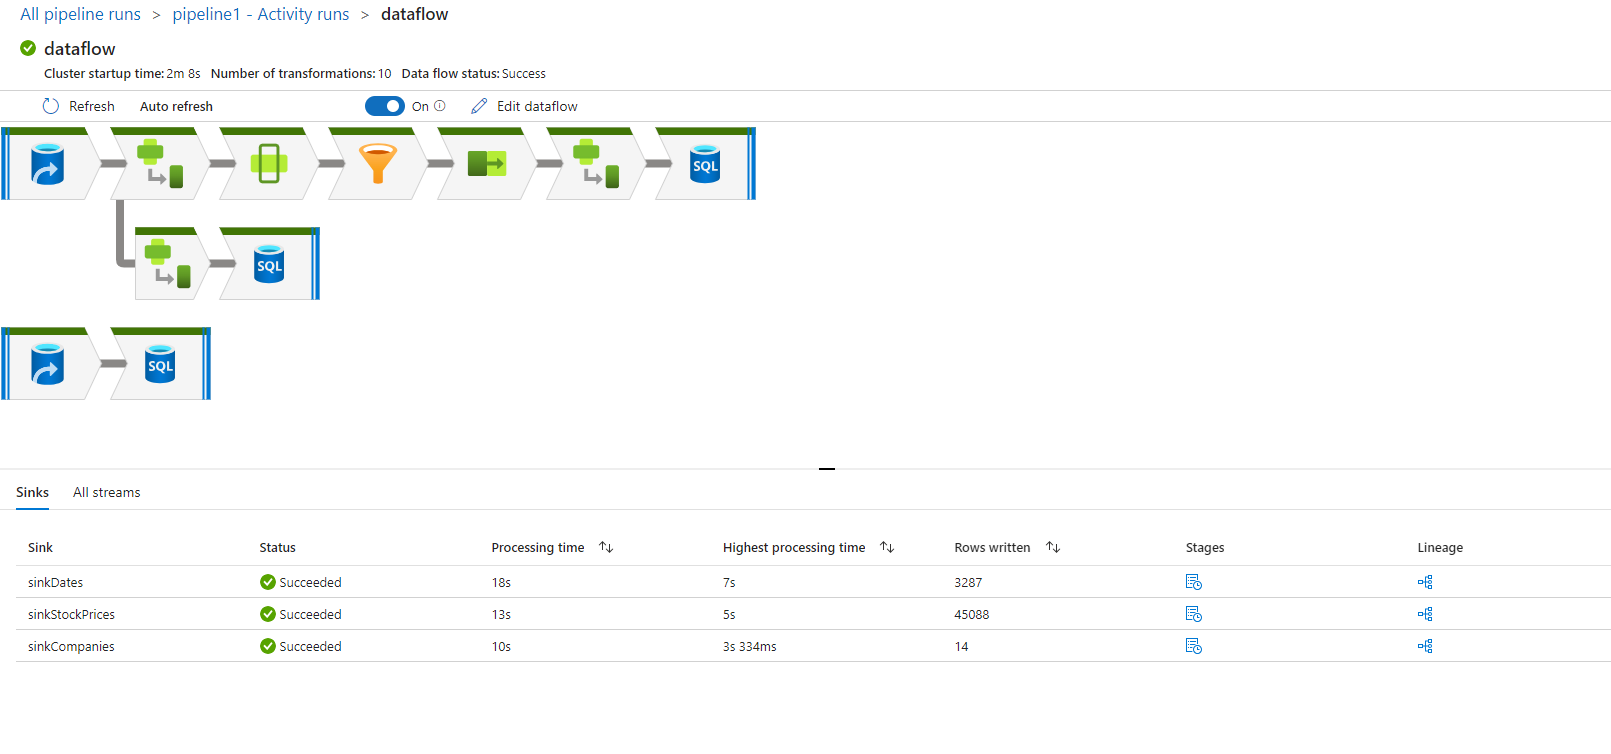

Também podemos verificar diretamente no banco de dados se as tabelas estão disponíveis.

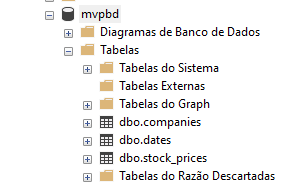

### **5. Analise dos dados**

Agora que temos os dados tratados e armazenados no banco de dados, podemos iniciar a análise. Para este projeto, escolhemos utilizar a plataforma Databricks junto com o Spark para a execução das consultas. O Databricks é uma plataforma de análise de dados que facilita a colaboração e o processamento de dados. O Apache Spark, por sua vez, é um motor de processamento de dados de alta performance, projetado para processamento em larga escala, que pode ser integrado ao Databricks para realizar consultas rápidas e eficientes em grandes volumes de dados.

Para executar consultas no Databricks, foi necessário criar um Cluster para processamento de dados, além de configurar um notebook em Python para realizar a análise dos dados.

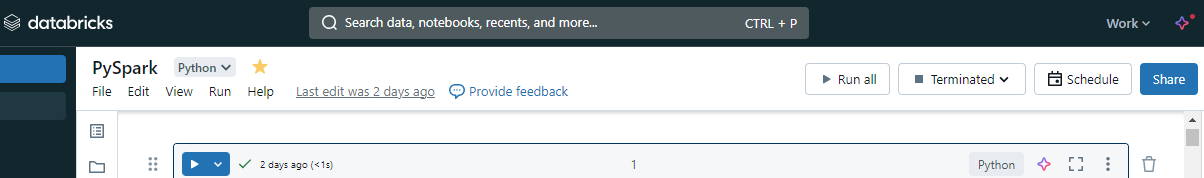

Abaixo veremos uma cópia do notebook criado no databricks, com os códigos que foram executados e suas saídas.

Inicialmente, fizemos o import das bibliotecas necessárias e a configuração para o acesso ao Azure SQL.

In [ ]:
#Imports
from pyspark.sql import SparkSession
from pyspark.sql.utils import AnalysisException
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
#Azure SQL connection
jdbcUsername = "CloudSA7xxxxx"
jdbcPassword = "xxxxxx"
jdbcHostname = "xxxxxx.database.windows.net"
jdbcPort = 1433
jdbcDatabase = "xxxxxx"

jdbcUrl = f"jdbc:sqlserver://{jdbcHostname}:{jdbcPort};database={jdbcDatabase}"
connectionProperties = {
    "user": jdbcUsername,
    "password": jdbcPassword,
    "driver": "com.microsoft.sqlserver.jdbc.SQLServerDriver"
}

#### **5.1 Qualidade de dados**

Antes de iniciar as análises, foram feitas algumas consultas de verificação para garantir que os dados foram gerados e armazenados corretamente.

In [ ]:
#Validating tables first rows
sqlc = "(SELECT * FROM companies) AS tmp"
sqld = "(SELECT * FROM dates) AS tmp"
sqls = "(SELECT * FROM stock_prices) AS tmp"

try:
    df_companies = spark.read.jdbc(url=jdbcUrl, table=sqlc, properties=connectionProperties)
    df_dates = spark.read.jdbc(url=jdbcUrl, table=sqld, properties=connectionProperties)
    df_prices = spark.read.jdbc(url=jdbcUrl, table=sqls, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

df_companies.show(15)
df_dates.show(15)
df_prices.show(15)

+------------+--------------------+
|stock_symbol|             company|
+------------+--------------------+
|        AAPL|          Apple Inc.|
|        ADBE|          Adobe Inc.|
|        AMZN|    Amazon.com, Inc.|
|         CRM|    Salesforce, Inc.|
|        CSCO| Cisco Systems, Inc.|
|       GOOGL|       Alphabet Inc.|
|         IBM|International Bus...|
|        INTC|   Intel Corporation|
|        META|Meta Platforms, Inc.|
|        MSFT|Microsoft Corpora...|
|        NFLX|       Netflix, Inc.|
|        NVDA|  NVIDIA Corporation|
|        ORCL|  Oracle Corporation|
|        TSLA|         Tesla, Inc.|
+------------+--------------------+

+--------+----+------+-------------------+
|      id|year| month|          full_date|
+--------+----+------+-------------------+
|20100104|2010|201001|2010-01-04 00:00:00|
|20100105|2010|201001|2010-01-05 00:00:00|
|20100106|2010|201001|2010-01-06 00:00:00|
|20100107|2010|201001|2010-01-07 00:00:00|
|20100108|2010|201001|2010-01-08 00:00:00|
|201001

Verificando as primeiras linhas das tabelas, vemos que estão de acordo com o esperado.

In [ ]:
#Validating number of rows of campanies and stock_prices tables
sqlc = "(SELECT COUNT(*) AS rows FROM companies) AS tmp"
sqls = "(SELECT COUNT(*) AS rows FROM stock_prices) AS tmp"

try:
    df1 = spark.read.jdbc(url=jdbcUrl, table=sqlc, properties=connectionProperties)
    df2 = spark.read.jdbc(url=jdbcUrl, table=sqls, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

print("companies:")
df1.show()

print("prices:")
df2.show()

companies:
+----+
|rows|
+----+
|  14|
+----+

prices:
+-----+
| rows|
+-----+
|45088|
+-----+



A quantidade de linhas das tabelas companies e stock_prices estão de acordo com o esperado (mesma quantidade de linhas dos arquivos CSV).

In [ ]:
#Validating number of rows of dates table
sqlp = "(SELECT COUNT(DISTINCT date) AS expected_rows FROM stock_prices) AS tmp"
sqld = "(SELECT COUNT(*) AS rows FROM dates) AS tmp"

try:
    df1 = spark.read.jdbc(url=jdbcUrl, table=sqlp, properties=connectionProperties)
    df2 = spark.read.jdbc(url=jdbcUrl, table=sqld, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

print("dates:")
df1.show()
df2.show()

dates:
+-------------+
|expected_rows|
+-------------+
|         3287|
+-------------+

+----+
|rows|
+----+
|3287|
+----+



A quantidade de linhas esperadas na tabela dates é igual à quantidade de datas distintas na tabela stock_prices e, como podemos verificar acima, o número está de acordo.

In [ ]:
#Validating date range
sql = """
    (SELECT
        b.company,
        min(c.full_date) as dtMin,
        max(c.full_date) as dtMax
    FROM stock_prices a
    INNER JOIN companies b ON a.stock_symbol = b.stock_symbol
    INNER JOIN dates c ON a.date = c.id
    GROUP BY
        b.company) AS tmp
"""

try:
    df = spark.read.jdbc(url=jdbcUrl, table=sql, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

df.show()

+--------------------+-------------------+-------------------+
|             company|              dtMin|              dtMax|
+--------------------+-------------------+-------------------+
|          Adobe Inc.|2010-01-04 00:00:00|2022-12-29 00:00:00|
|       Alphabet Inc.|2010-01-04 00:00:00|2022-12-29 00:00:00|
|    Amazon.com, Inc.|2010-01-04 00:00:00|2022-12-29 00:00:00|
|          Apple Inc.|2010-01-04 00:00:00|2022-12-29 00:00:00|
| Cisco Systems, Inc.|2010-01-04 00:00:00|2022-12-29 00:00:00|
|   Intel Corporation|2010-01-04 00:00:00|2022-12-29 00:00:00|
|International Bus...|2010-01-04 00:00:00|2022-12-29 00:00:00|
|Meta Platforms, Inc.|2012-05-18 00:00:00|2023-01-24 00:00:00|
|Microsoft Corpora...|2010-01-04 00:00:00|2022-12-29 00:00:00|
|       Netflix, Inc.|2010-01-04 00:00:00|2022-12-29 00:00:00|
|  NVIDIA Corporation|2010-01-04 00:00:00|2022-12-29 00:00:00|
|  Oracle Corporation|2010-01-04 00:00:00|2022-12-29 00:00:00|
|    Salesforce, Inc.|2010-01-04 00:00:00|2022-12-29 00

Por fim, realizamos a validação da faixa de datas disponíveis para cada empresa de tecnologia. Como podemos observar, a data de início das empresas é 04/01/2010, exceto para as empresas que iniciaram a listagem após essa data, as quais são a Tesla (listada na NASDAQ em 29 de junho de 2010) e a Meta (listada na NASDAQ em 18 de maio de 2012).

Vemos também que a data final de cotações é do último dia útil de 2022, exceto para a Microsoft que possui alguns registros de 2023, mas para nossas análises consideramos 2022 como a data final.

#### **5.2 Análise de dados**

Em seguida, realizamos a analise dos dados, buscando responder as questões levandas ao inicio do projeto.

Para responder à pergunta "Qual foi o valor mínimo e máximo que as cotações dessas empresas alcançaram nos últimos anos?", buscamos nas bases de dados disponíveis o maior e o menor valor que as cotações de cada empresa alcançou nos anos de 2020, 2021 e 2022. Utilizando os resultados da query executada, geramos um gráfico com os resultados para auxiliar na visualização.

In [ ]:
#1. What is the maximum and minimum stock price each company reached in the last three years?
sql = """
    (SELECT TOP 100
        b.company,
        MAX(a.high) AS high,
        MIN(a.low) AS low,
        c.year
    FROM stock_prices a
    INNER JOIN companies b ON a.stock_symbol = b.stock_symbol
    INNER JOIN dates c ON a.date = c.id
    WHERE c.year IN (2020, 2021, 2022)
    GROUP BY
        b.company,
        c.year
    ORDER BY
        b.company,
        c.year) AS tmp
"""

try:
    results = spark.read.jdbc(url=jdbcUrl, table=sql, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

results.show(100)

+--------------------+---------+---------+----+
|             company|     high|      low|year|
+--------------------+---------+---------+----+
|          Adobe Inc.|   536.88|   255.13|2020|
|          Adobe Inc.|   699.54|   420.78|2021|
|          Adobe Inc.|    575.0|   274.73|2022|
|       Alphabet Inc.|  92.1915|  50.4435|2020|
|       Alphabet Inc.| 150.9665|   84.805|2021|
|       Alphabet Inc.| 151.5465|    83.34|2022|
|    Amazon.com, Inc.| 177.6125|  81.3015|2020|
|    Amazon.com, Inc.|  188.654|   144.05|2021|
|    Amazon.com, Inc.|    171.4|    81.69|2022|
|          Apple Inc.|   138.79|  53.1525|2020|
|          Apple Inc.|   182.13|   116.21|2021|
|          Apple Inc.|   182.94|   125.87|2022|
| Cisco Systems, Inc.|    50.28|     32.4|2020|
| Cisco Systems, Inc.|    64.29|    43.35|2021|
| Cisco Systems, Inc.|    63.35|     38.6|2022|
|   Intel Corporation|    69.29|    43.61|2020|
|   Intel Corporation|    68.49|    47.87|2021|
|   Intel Corporation|    56.28|    24.5

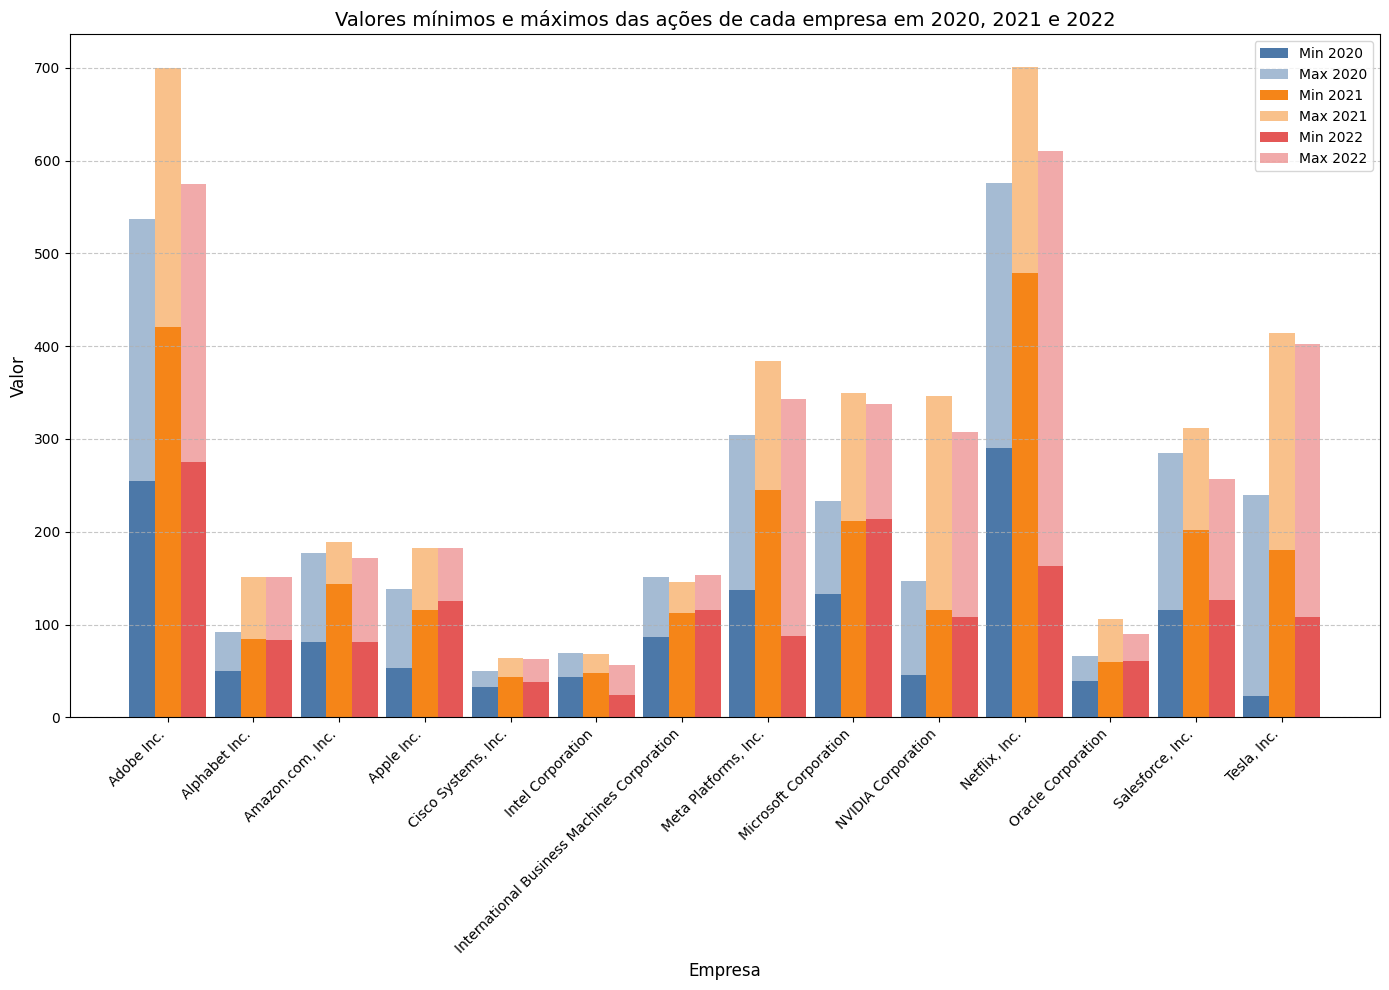

In [ ]:
# graphical representation of the results
results_pd = results.toPandas()

grouped = results_pd.groupby(['company', 'year']).agg({'high': 'max', 'low': 'min'}).reset_index()

companies = grouped['company'].unique()
years = grouped['year'].unique()
bar_width = 0.3
bar_positions = range(len(companies))
colors = ['#4c78a8', '#f58518', '#e45756']

fig, ax = plt.subplots(figsize=(14, 10))

for i, year in enumerate(years):
    year_data = grouped[grouped['year'] == year]
    highs = year_data['high']
    lows = year_data['low']

    ax.bar([pos + i * bar_width for pos in bar_positions], lows, width=bar_width, label=f'Min {year}', color=colors[i])
    ax.bar([pos + i * bar_width for pos in bar_positions], highs - lows, width=bar_width, bottom=lows, label=f'Max {year}', color=colors[i], alpha=0.5)

ax.set_xlabel('Empresa', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Valores mínimos e máximos das ações de cada empresa em 2020, 2021 e 2022', fontsize=14)
ax.set_xticks([pos + (len(years) - 1) * bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(companies, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Para responder à segunda pergunta "A pandemia de Covid-19 teve algum impacto no valor das ações dessas empresas?", comparamos o valor médio das cotações do ano de 2019 (antes da pandemia) com as do ano de 2020 (durante a pandemia).

In [ ]:
#2. Did the pandemic had any impact on the stock prices of these companies?
#Comparing the average stock prices in 2019 (pre-pandemic) with the average stock prices in 2020 (during the pandemic)

sql = """
    (SELECT TOP 100
        b.company,
        AVG(a.[adj_close]) AS avg_price,
        c.year
    FROM stock_prices a
    INNER JOIN companies b ON a.stock_symbol = b.stock_symbol
    INNER JOIN dates c ON a.date = c.id
    WHERE c.year IN (2019, 2020)
    GROUP BY
        b.company,
        c.year
    ORDER BY
        b.company,
        c.year) AS tmp
"""

try:
    results = spark.read.jdbc(url=jdbcUrl, table=sql, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

results.show(100)

+--------------------+------------------+----+
|             company|         avg_price|year|
+--------------------+------------------+----+
|          Adobe Inc.|  279.322818150596|2019|
|          Adobe Inc.| 415.9712655892956|2020|
|       Alphabet Inc.|59.560847131032794|2019|
|       Alphabet Inc.|  73.9496560530229|2020|
|    Amazon.com, Inc.|  89.4594602433462|2019|
|    Amazon.com, Inc.|134.04275452383894|2020|
|          Apple Inc.|50.702359820169114|2019|
|          Apple Inc.| 93.91639358158639|2020|
| Cisco Systems, Inc.|45.204785256158736|2019|
| Cisco Systems, Inc.| 39.73812596317337|2020|
|   Intel Corporation| 46.48002757723369|2019|
|   Intel Corporation|50.790813732524164|2020|
|International Bus...|110.40913067166767|2019|
|International Bus...|105.11702453854527|2020|
|Meta Platforms, Inc.| 181.6374996124752|2019|
|Meta Platforms, Inc.|234.55086984747484|2020|
|Microsoft Corpora...|125.93545638190375|2019|
|Microsoft Corpora...| 188.7167906026124|2020|
|       Netfl

Analisando o gráfico gerado com os dados obtidos, observamos que durante a pandemia houve um grande aumento no valor médio das ações dessas empresas. A única exceção foi a Cisco, que apresentou uma diminuição no valor médio das ações, embora essa queda não tenha sido significativa.

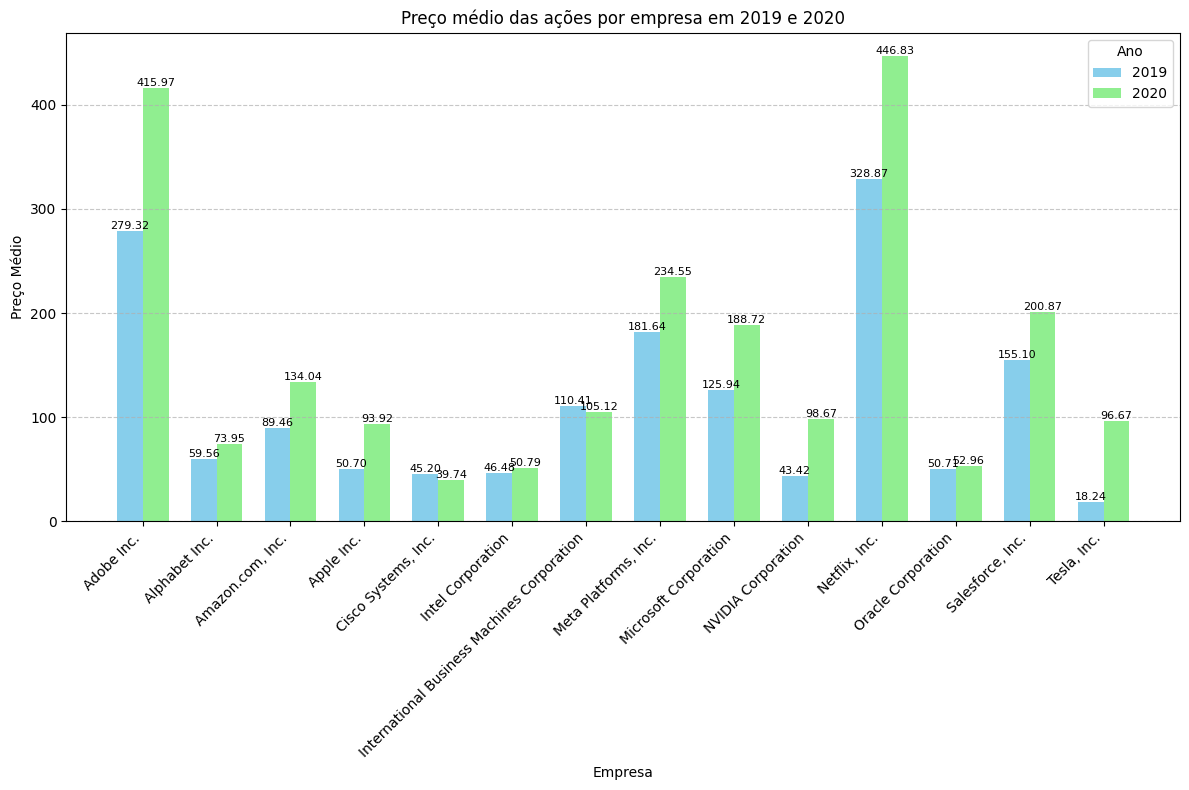

In [ ]:
# graphical representation of the results
results_pd = results.toPandas()

results_pd['year'] = results_pd['year'].astype(str)

pivot_df = results_pd.pivot_table(index='company', columns='year', values='avg_price', aggfunc='mean')

plt.figure(figsize=(12, 8))
bar_width = 0.35
r1 = range(len(companies))
r2 = [x + bar_width for x in r1]

bars_2019 = plt.bar(r1, pivot_df['2019'], width=bar_width, label='2019', color='skyblue')
bars_2020 = plt.bar(r2, pivot_df['2020'], width=bar_width, label='2020', color='lightgreen')

for idx, bar_2019, bar_2020 in zip(r1, bars_2019, bars_2020):
    plt.text(bar_2019.get_x() + bar_2019.get_width() / 2, bar_2019.get_height(), '{:.2f}'.format(pivot_df.loc[companies[idx], '2019']),
                ha='center', va='bottom', color='black', fontsize=8)
    plt.text(bar_2020.get_x() + bar_2020.get_width() / 2, bar_2020.get_height(), '{:.2f}'.format(pivot_df.loc[companies[idx], '2020']),
                ha='center', va='bottom', color='black', fontsize=8)

plt.title('Preço médio das ações por empresa em 2019 e 2020')
plt.xlabel('Empresa')
plt.ylabel('Preço Médio')
plt.xticks([r + bar_width / 2 for r in range(len(companies))], companies, rotation=45, ha='right')
plt.legend(title='Ano')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Para responder a terceira pergunta "Quanto as ações de cada uma dessas empresas valorizaram em 10 anos?", iremos comparar o valor do último dia de janeiro de 2010 com a mesma data dez anos depois (2020). Criaremos também um campo chamado "growth", que irá mostrar o percentual de crescimento comparando esses dois valores

In [ ]:
#3. How much did each company's stocks appreciate over 10 years?
# Calculating the difference in stock prices between January 2010 and January 2020
# The 'growth' field represents the percentage (%) increase in the stock value.

sql = """
    (SELECT TOP 100
        a.company,
        MAX(a.value_2010) AS value_2010,
        MAX(a.value_2020) AS value_2020,
        ((MAX(a.value_2020) - MAX(a.value_2010)) / MAX(a.value_2010)) * 100 AS growth
    FROM (
        SELECT
            b.company,
            CASE WHEN c.full_date = '2010-01-29' THEN a.adj_close ELSE NULL END AS value_2010,
            CASE WHEN c.full_date = '2020-01-29' THEN a.adj_close ELSE NULL END AS value_2020
        FROM stock_prices a
        INNER JOIN companies b ON a.stock_symbol = b.stock_symbol
        INNER JOIN dates c ON a.date = c.id
        WHERE c.full_date IN ('2010-01-29', '2020-01-29')
    ) AS a
    GROUP BY a.company
    ORDER BY ((MAX(a.value_2020) - MAX(a.value_2010)) / MAX(a.value_2010)) * 100 DESC
    ) AS tmp
"""

try:
    results = spark.read.jdbc(url=jdbcUrl, table=sql, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

results.show(100)

+--------------------+----------+----------+---------+
|             company|value_2010|value_2020|   growth|
+--------------------+----------+----------+---------+
|       Netflix, Inc.|  8.892857|    343.16|3758.8276|
|  NVIDIA Corporation|  3.531051| 61.173195| 1632.436|
|    Amazon.com, Inc.|    6.2705|      92.9|1381.5405|
|          Apple Inc.|  5.846978|  79.43714|1258.6017|
|    Salesforce, Inc.|   15.8875|    181.77| 1044.107|
|          Adobe Inc.|      32.3|    351.66| 988.7307|
|Microsoft Corpora...| 21.563454| 163.36554| 657.6038|
|       Alphabet Inc.| 13.261762|    72.835| 449.2106|
|   Intel Corporation| 13.026489| 60.676655|365.79437|
| Cisco Systems, Inc.| 15.830134| 42.818954|170.49014|
|  Oracle Corporation| 19.295464| 50.644123|162.46648|
|International Bus...| 75.138626|   113.457|50.996906|
|         Tesla, Inc.|      NULL| 38.732666|     NULL|
|Meta Platforms, Inc.|      NULL|    223.23|     NULL|
+--------------------+----------+----------+---------+



Analisando o gráfico dos resultados obtidos, observamos que a maioria dessas empresas apresentou um crescimento significativo. Destacam-se Netflix, NVIDIA, Amazon, Apple e Salesforce, todas com um crescimento superior a 1000%.

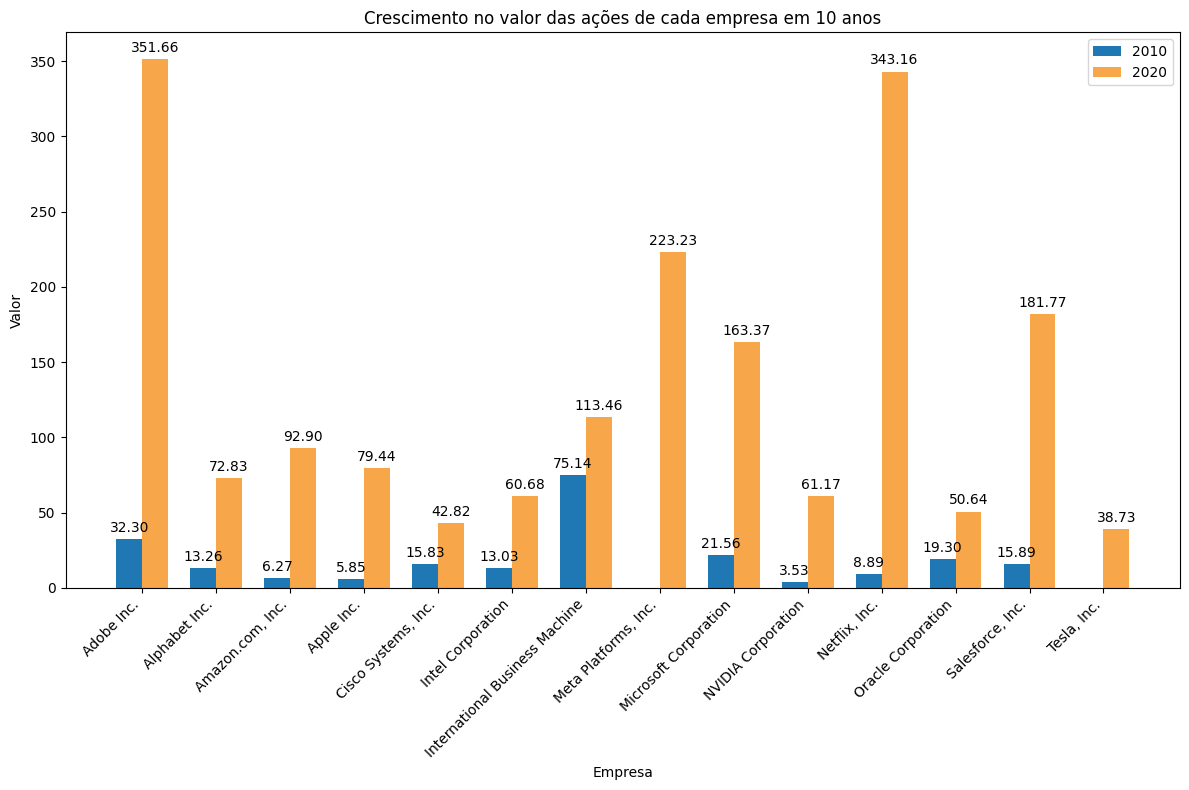

In [ ]:
# graphical representation of the results
results_pd = results.toPandas()

results_pd['company'] = results_pd['company'].apply(lambda x: x[:30])
results_pd.sort_values(by='company', inplace=True)

companies = results_pd['company'].tolist()
values_2010 = results_pd['value_2010'].tolist()
values_2020 = results_pd['value_2020'].tolist()

colors = ['#1f77b4', '#F7A649']

bar_width = 0.35
index = np.arange(len(companies))

fig, ax = plt.subplots(figsize=(12, 8))
bars_2010 = ax.bar(index - bar_width/2, values_2010, bar_width, label='2010', color=colors[0])
bars_2020 = ax.bar(index + bar_width/2, values_2020, bar_width, label='2020', color=colors[1])

ax.set_xlabel('Empresa')
ax.set_ylabel('Valor')
ax.set_title('Crescimento no valor das ações de cada empresa em 10 anos')
ax.set_xticks(index)
ax.set_xticklabels(companies, rotation=45, ha='right')
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_2010)
autolabel(bars_2020)

fig.tight_layout()
plt.show()

Para responder à quarta pergunta "Das empresas que mais cresceram e das que menos cresceram em 10 anos, qual foi o volume médio de transações nesse período?", calcularemos o volume médio de transações mensais no mesmo período da análise anterior. Utilizando os resultados obtidos anteriormente, analisaremos apenas o desempenho da Netflix e NVIDIA (empresas que mais cresceram) e da Oracle e IBM (empresas que menos cresceram).

In [ ]:
#4. What is the average monthly transaction volume of the companies that grew the most in these 10 years? And of those that grew the least?
sql = """
    (SELECT TOP 10000
        b.company,
        AVG(CAST(a.volume AS BIGINT)) AS volume,
        c.month
    FROM stock_prices a
    INNER JOIN companies b ON a.stock_symbol = b.stock_symbol
    INNER JOIN dates c ON a.date = c.id
    WHERE b.company IN ('Netflix, Inc.', 'International Business Machines Corporation','Oracle Corporation', 'NVIDIA Corporation')
    AND c.full_date between '2010-01-29' and '2020-01-29'
    GROUP BY
        b.company,
        c.month
    ORDER BY
        b.company,
        c.month) AS tmp
"""

try:
    results = spark.read.jdbc(url=jdbcUrl, table=sql, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

results.show(15)

+--------------------+--------+------+
|             company|  volume| month|
+--------------------+--------+------+
|International Bus...|12103475|201001|
|International Bus...| 6232574|201002|
|International Bus...| 6366833|201003|
|International Bus...| 7293429|201004|
|International Bus...| 9855631|201005|
|International Bus...| 7703271|201006|
|International Bus...| 7176556|201007|
|International Bus...| 5581551|201008|
|International Bus...| 5782532|201009|
|International Bus...| 6838085|201010|
|International Bus...| 5185007|201011|
|International Bus...| 4440403|201012|
|International Bus...| 6214892|201101|
|International Bus...| 4903400|201102|
|International Bus...| 5899180|201103|
+--------------------+--------+------+
only showing top 15 rows



Analisando o gráfico dos resultados obtidos, observamos que a IBM manteve um volume médio de transações extremamente estável durante esse período. As demais empresas tiveram um grande aumento entre 2010 e 2011. A NVIDIA, em particular, destacou-se também nos períodos de 2017 a 2018 e de 2019 a 2020.

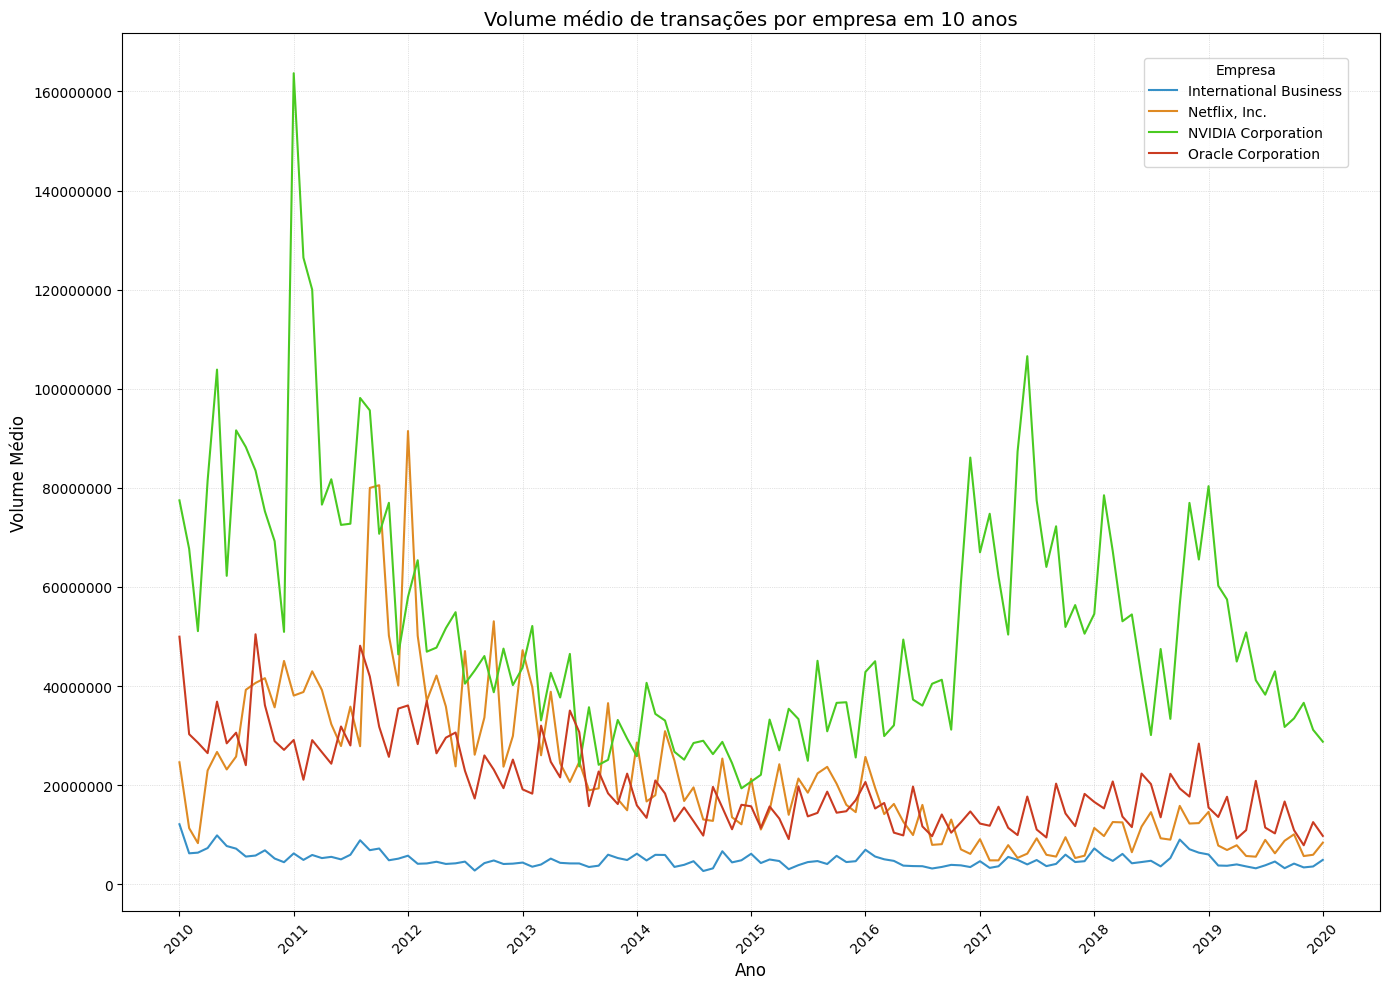

In [ ]:
# graphical representation of the results
results_pd = results.toPandas()

results_pd['month'] = pd.to_datetime(results_pd['month'], format='%Y%m')
results_pd['company'] = results_pd['company'].apply(lambda x: x[:22])

fig, ax = plt.subplots(figsize=(14, 10))

colors = ['#3690C7', '#DF8A23', '#4ACA21', '#CA3B21']

for i, company in enumerate(results_pd['company'].unique()):
    company_data = results_pd[results_pd['company'] == company]
    ax.plot(company_data['month'], company_data['volume'], label=company, color=colors[i], linewidth=1.5)

ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Volume Médio', fontsize=12)
ax.set_title('Volume médio de transações por empresa em 10 anos', fontsize=14)

ax.legend(title='Empresa', fontsize=10, bbox_to_anchor=(0.98, 0.98), loc='upper right')

plt.xticks(rotation=45)
plt.yticks(fontsize=10)

def format_volume(x, pos):
    return '{:.0f}'.format(x)

ax.yaxis.set_major_formatter(FuncFormatter(format_volume))
ax.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

Para responder à quinta e última pergunta "Quais dessas empresas são mais novas no mercado? Qual foi o valor médio das cotações dessas empresas no último ano?", analisaremos o desempenho diário no ano de 2022 da Meta e da Tesla que,conforme observado na validação da faixa de datas, foram as empresas que começaram a cotar somente após janeiro de 2010.

In [ ]:
#5. Which of these companies are newer to the market? What was the average quotation value of these companies in the last year?
sql = """
    (SELECT TOP 1000
        b.company,
        a.adj_close,
        c.full_date
    FROM stock_prices a
    INNER JOIN companies b ON a.stock_symbol = b.stock_symbol
    INNER JOIN dates c ON a.date = c.id
    WHERE b.company IN ('Meta Platforms, Inc.', 'Tesla, Inc.')
    AND c.full_date > '2021-12-31' AND c.full_date < '2023-01-01'
    ORDER BY
        b.company,
        c.full_date) AS tmp
"""

try:
    results = spark.read.jdbc(url=jdbcUrl, table=sql, properties=connectionProperties)
except AnalysisException as e:
    print(f"Error: {e}")

results.show(15)

+--------------------+---------+-------------------+
|             company|adj_close|          full_date|
+--------------------+---------+-------------------+
|Meta Platforms, Inc.|   338.54|2022-01-03 00:00:00|
|Meta Platforms, Inc.|   336.53|2022-01-04 00:00:00|
|Meta Platforms, Inc.|   324.17|2022-01-05 00:00:00|
|Meta Platforms, Inc.|   332.46|2022-01-06 00:00:00|
|Meta Platforms, Inc.|   331.79|2022-01-07 00:00:00|
|Meta Platforms, Inc.|   328.07|2022-01-10 00:00:00|
|Meta Platforms, Inc.|   334.37|2022-01-11 00:00:00|
|Meta Platforms, Inc.|   333.26|2022-01-12 00:00:00|
|Meta Platforms, Inc.|   326.48|2022-01-13 00:00:00|
|Meta Platforms, Inc.|    331.9|2022-01-14 00:00:00|
|Meta Platforms, Inc.|   318.15|2022-01-18 00:00:00|
|Meta Platforms, Inc.|   319.59|2022-01-19 00:00:00|
|Meta Platforms, Inc.|   316.56|2022-01-20 00:00:00|
|Meta Platforms, Inc.|   303.17|2022-01-21 00:00:00|
|Meta Platforms, Inc.|   308.71|2022-01-24 00:00:00|
+--------------------+---------+--------------

Observando os valores das cotações das duas empresas no gráfico abaixo, podemos notar que houve uma grande queda no valor médio das ações ao longo do ano.

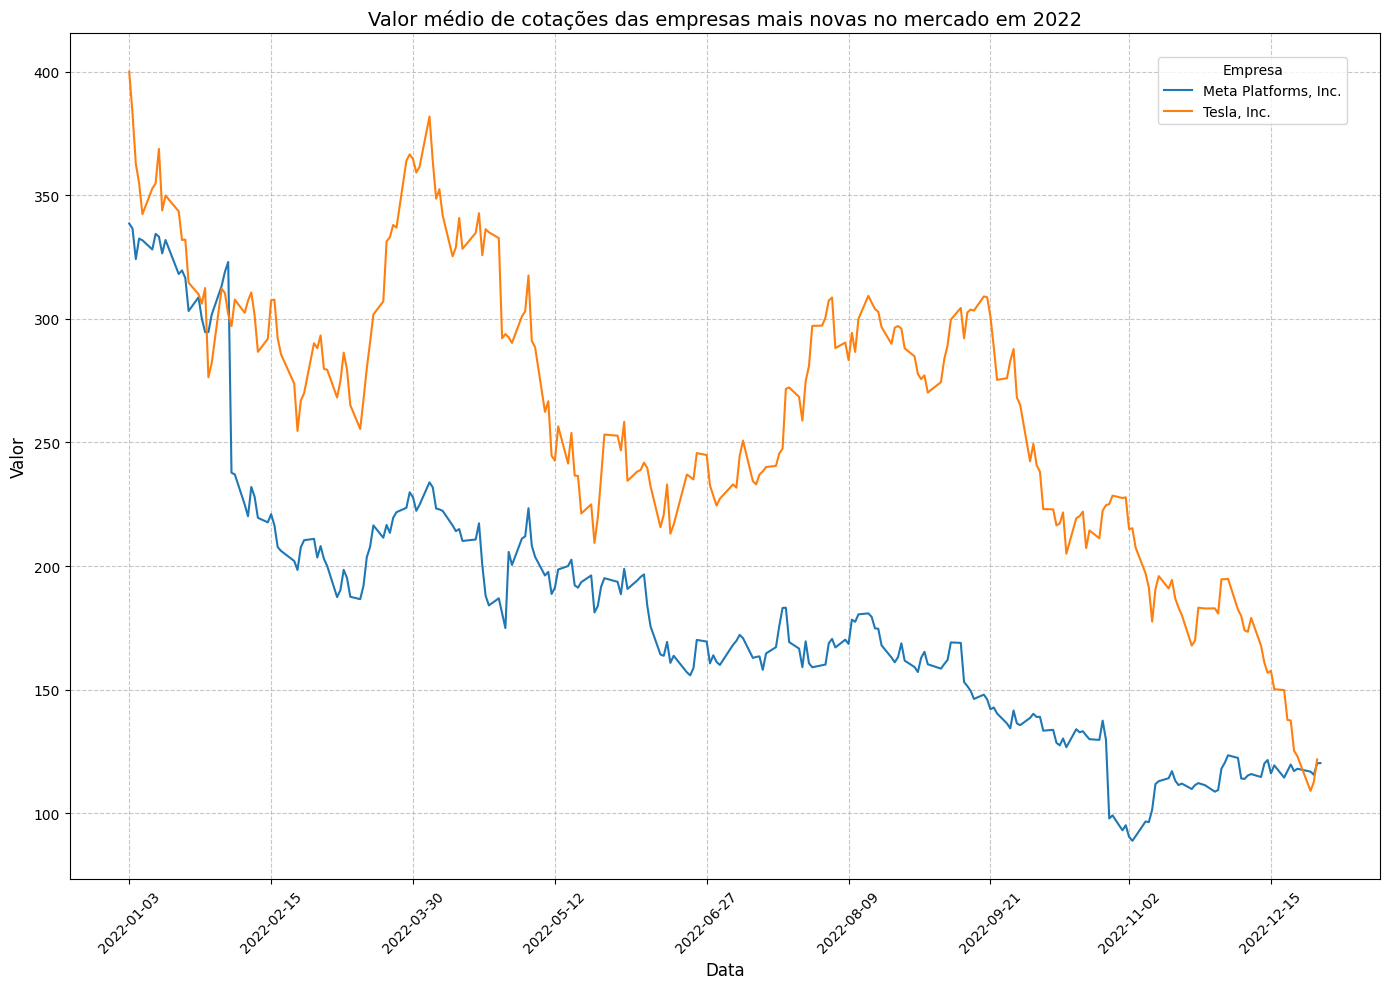

In [ ]:
# graphical representation of the results
results_pd = results.toPandas()

fig, ax = plt.subplots(figsize=(14, 10))

for company in results_pd['company'].unique():
    company_data = results_pd[results_pd['company'] == company]
    ax.plot(company_data['full_date'], company_data['adj_close'], label=company)

ax.set_xlabel('Data', fontsize=12)
ax.set_ylabel('Valor', fontsize=12)
ax.set_title('Valor médio de cotações das empresas mais novas no mercado em 2022', fontsize=14)
ax.legend(title='Empresa', fontsize=10, bbox_to_anchor=(0.98, 0.98), loc='upper right')
plt.xticks(rotation=45)

all_dates = results_pd['full_date'].unique()
date_ticks = all_dates[::30]
ax.set_xticks(date_ticks)

ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **6. Conclusão**

Com o uso dessas ferramentas, conseguimos atingir o objetivo final definido no início do projeto. Começamos com a busca e modelagem dos dados, seguidos pelo processo de ETL que possibilitou o armazenamento do modelo no banco de dados Azure SQL. A partir da disponibilização desses dados, conseguimos responder todas as perguntas definidas através de análises eficazes e representações gráficas utilizando bibliotecas do Python.

Ao longo do projeto, observamos como a plataforma Data Factory foi fundamental para otimizar a ingestão, transformação e carga dos dados na nuvem, garantindo a integridade e a confiabilidade dos dados em cada etapa. A integração do Databricks com o Spark proporcionou uma análise robusta e em tempo real, destacando-se pela capacidade de processar grandes volumes de dados de forma ágil e eficiente, utilizando recursos avançados de processamento paralelo.

Essas soluções não apenas simplificaram a gestão de dados complexos, mas também abriram novas possibilidades para análises preditivas e tomadas de decisão baseadas em dados mais informadas e rápidas. O projeto demonstrou claramente como a combinação de ferramentas de nuvem modernas pode impulsionar significativamente a eficiência e a eficácia dos processos analíticos e operacionais.